# Sagehen Data Exploration
***

__Library Imports & Initial Setup__

In [1]:
import pandas as pd
% matplotlib inline

import sagehen_pandas

__How Columns were renamed__

- "DATE": 'date',
- "HOUR OF DAY ENDING AT L.S.T": "hour",
- "TOTAL SOLAR RAD (K W-hr/m^2)": "solar_rad",
- "AVE WIND SPEED (m/s)": "wind_ave",
- "V. WIND DIR (Deg)": "wind_dir",
- "MAX WIND SPEED (m/s)": "wind_max",
- "AIR TEMP AVE (Deg C)": "temp_ave",
- "AIR TEMP MAX (Deg C)": "temp_max",
- "AIR TEMP MIN (Deg C)": "temp_min",
- "SOIL TEMP AVE (Deg C)": "soil_tave",
- "SOIL TEMP MAX (Deg C)": "soil_tmax",
- "SOIL TEMP MIN (Deg C)": "soil_tmin",
- "RELATIVE HUMIDITY AVE (%)": "rh_ave",
- "RELATIVE HUMIDITY MAX (%)": "rh_max",
- "RELATIVE HUMIDITY MIN (%)": "rh_min",
- "DEW PT. (Deg C)": "dew_pt",
- "WET BULB (Deg C)": "wet_bulb",
- "BARO. PRESS. (mb)": "pressure",
- "SNOW DEPTH (mm)": "snow",
- "TOTAL PRECIP (mm)": "precip"

## "Hourly Sagehen Climate Data Apr 1997 - Dec 2017"

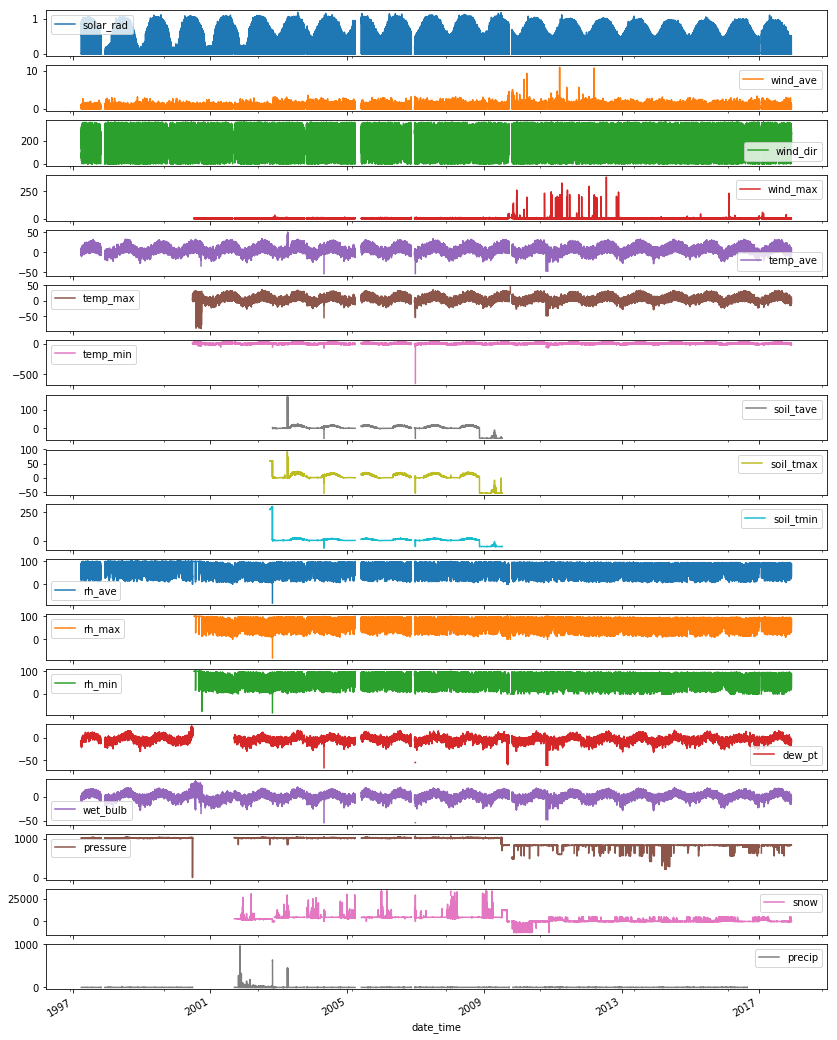

In [2]:
all_data = sagehen_pandas.year_search(1997,2018)
# dropped = ['solar_rad', 'precip', 'snow', 'wind_dir']
# ave_vals = all_data.drop(dropped, axis=1)
ax1 = all_data.plot(
    subplots=True, 
    figsize=(14,20),
)

Text(0,0.5,'Wind Max (m/s)')

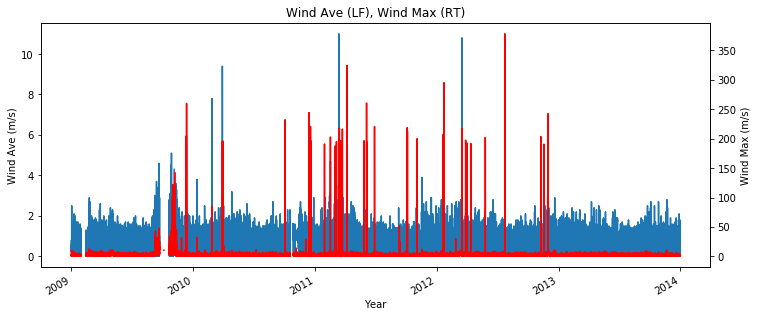

In [19]:
wind_ave = sagehen_pandas.year_search(2009, 2013)['wind_ave']
wind_max = sagehen_pandas.year_search(2009, 2013)['wind_max']
ax = wind_ave.plot(
    figsize=(12,5),
    title="Wind Ave (LF), Wind Max (RT)"
)
ax2 = wind_max.plot(
   secondary_y=True, 
   figsize=(12,5),
   colormap='autumn'
)
ax.set_xlabel("Year")
ax.set_ylabel("Wind Ave (m/s)")
ax2.set_ylabel("Wind Max (m/s)")

### Negative Snow Depth values reported in 2010

Text(0.5,0,'Month')

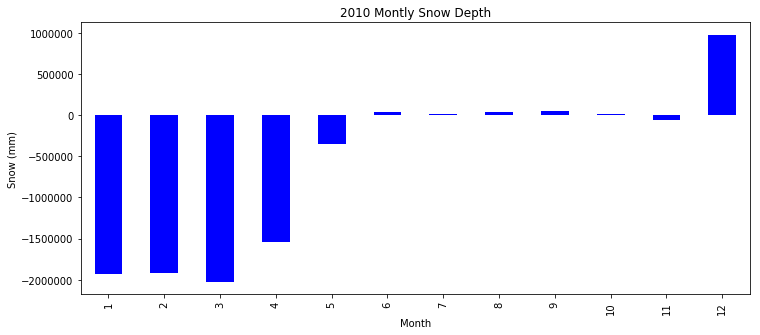

In [5]:
twenty_ten = sagehen_pandas.year_search(2010,2010)
twenty10_snow = twenty_ten['snow'].resample('M').sum()
ax = twenty10_snow.plot(
    kind="bar",
    title="2010 Montly Snow Depth",
    figsize=(12,5),
    colormap="winter"
)
ax.set_xticklabels([num for num in range(1,13)])
ax.set_ylabel("Snow (mm)")
ax.set_xlabel("Month")

FYI: 1 Million mm is 3280.84 feet or a little more than 6/10ths of a mile.

In [6]:
# all_snow = sagehen_pandas.date_search('2001-09-01', '2018-01-01').resample('Y')['snow'].sum()
# ax = all_snow.plot(
#     kind="bar",
#     title="Montly Snow Depth from SEP 2001 - DEC 2017",
#     figsize=(16,5),
#     colormap="winter"
# )
# ax.set_xticklabels(all_snow.index.year)
# ax.set_ylabel("Snow (mm)")
# ax.set_xlabel("Year")

__Extremely Low Pressure Values in some years__

* Date Ranges:
    - 2001-2003
    - 2009-2017

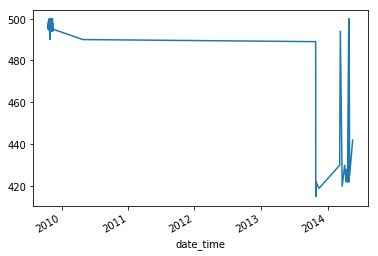

In [23]:
# baro_check = sagehen_pandas.year_search(1997, 2018).resample('Y').mean()
# pressure = baro_check['pressure']
baro = sagehen_pandas.value_search('pressure',400, 500)['pressure']
baro.plot()

In [8]:
# ax1 = pressure.plot(
#     kind="bar",
#     title="Yearly Baro. Pressure",
#     figsize=(16,5),
#     colormap="winter"
# )
# ax1.set_xticklabels(pressure.index.year)
# ax1.set_ylabel("mb")
# ax1.set_xlabel("Year")

***
## Daily Data
* Average hourly data of each column
* Drop the following columns because they are best represneted as cumilative values rather than averaged values:
    * `solar_rad`, `snow`, `precip`
* Re-insert the dropped columns with their Summed values

In [9]:
# daily_sage = sage_df.resample('D').mean()

# dropped = ['solar_rad', 'snow', 'precip']
# daily_sage.drop(dropped, axis=1, inplace=True)

# solar_sum = sage_df['solar_rad'].resample('D').sum()
# daily_sage.insert(loc=0, column='solar_rad', value=solar_sum)

# snow_sum = sage_df['snow'].resample('D').sum()
# daily_sage.insert(16, 'snow', snow_sum)

# precip_sum = sage_df['precip'].resample('D').sum()
# daily_sage.insert(17, 'precip', precip_sum)

In [10]:
# daily_sage.tail()

In [11]:
# ax = monthly_sage['temp_ave'].plot(
#     kind="kde",
#     title="KDE of Monthly Ave Air Temp",
#     figsize=(12,5)
# )
# ax.set_xlabel("Air Temperature ºC")

In [12]:
# ax = monthly_sage['soil_tave'].plot(
#     kind="kde",
#     title="KDE of Monthly Ave Soil Temp",
#     figsize=(12,5)
# )
# ax.set_xlabel("Soil Temperature ºC")

In [13]:
# ax = monthly_sage['pressure'].plot(
#     kind="kde",
#     title="KDE of Monthly Ave Baro. Pressure",
#     figsize=(12,5)
# )
# ax.set_xlabel("Baro. Pressure (mb)")

***
## Yearly Data

In [14]:
# yearly_sage = sage_df.resample('Y').mean()

# dropped = ['solar_rad', 'snow', 'precip']
# yearly_sage.drop(dropped, axis=1, inplace=True)

# solar_sum = sage_df['solar_rad'].resample('Y').sum()
# yearly_sage.insert(loc=0, column='solar_rad', value=solar_sum)

# snow_sum = sage_df['snow'].resample('Y').sum()
# yearly_sage.insert(16, 'snow', snow_sum)

# precip_sum = sage_df['precip'].resample('Y').sum()
# yearly_sage.insert(17, 'precip', precip_sum)

In [15]:
# yearly_sage.set_index(yearly_sage.index.year, inplace=True)
# yearly_sage.index.name = 'year'

In [16]:
# ax = yearly_sage['precip'].plot(
#     kind='bar', legend=True, figsize=(12,5),
#     xticks=yearly_sage.index, colormap='winter'
# )
# ax2 = yearly_sage['snow'].plot(
#     kind='bar', secondary_y=True, legend=True,
#     colormap='autumn',
# )
# ax2.set_ylabel("Snow mm")
# ax.set_xlabel("Years")
# ax.set_ylabel("Precip. mm")